In [1]:
%%bash

echo "> ls ../runs/"
ls ../runs/
echo
echo "> ls ../runs/new-data-runs-1/runtime_scores"
ls -rt ../runs/new-data-runs-1/runtime_scores

> ls ../runs/
first-run
new-data-runs-1
new-data-runs-2
second-run
third-run-no-geoloc

> ls ../runs/new-data-runs-1/runtime_scores
AGSO_scores.pkl
JAMSTEC_scores.pkl
NGA_scores.pkl
NOAA_geodas_scores.pkl
US_multi_scores.pkl
small
NGDC_scores.pkl
SIO_scores.pkl


## List regions

In [3]:
import os


base_dir = "../runs/new-data-runs-1/runtime_scores"
output_ls = """
AGSO_scores.pkl
JAMSTEC_scores.pkl
NGA_scores.pkl
NOAA_geodas_scores.pkl
US_multi_scores.pkl
NGDC_scores.pkl
SIO_scores.pkl
"""
save_dir = "export-new-features"


def get_regions(output_ls):
    return [s.rsplit('_', 1)[0] for s in output_ls.strip().split('\n')]


if not os.path.exists(save_dir):
    os.mkdir(save_dir)
regions = get_regions(output_ls)
regions

['AGSO', 'JAMSTEC', 'NGA', 'NOAA_geodas', 'US_multi', 'NGDC', 'SIO']

## Export feature values and predictions

Later we can simply load first four columns of the features from the `*_scores.pkl` files (instead of loading
from the raw testing data).

In [4]:
import json
import os
import pickle
import numpy as np


with open("../modeling/config.json") as f:
    config = json.load(f)

with open(config["testing_files"]) as f:
    all_testing_files = f.readlines()

prefix = "test"
for region in regions:
    '''
    region_files = [filepath.strip() for filepath in all_testing_files if "/{}/".format(region) in filepath]
    bin_region_files = map(lambda filename: "../" + get_binary_filename(prefix, filename), region_files)
    bin_region_files = filter(os.path.exists, bin_region_files)

    # Read features
    features_for_vis = []
    for filename in bin_region_files:
        features, _labels, _weights, _ = read_data_from_binary(filename)
        cols_for_vis = map(lambda elem: elem[:4], features)
        features_for_vis += list(cols_for_vis)
    '''

    # Read scores
    scores_filepath = os.path.join(base_dir, "{}_scores.pkl".format(region))
    with open(scores_filepath, 'rb') as f:
        features_for_vis, labels, scores, weights = pickle.load(f)
    edit_rate = np.sum(labels) / labels.shape[0]
    weighted_edit_rate = np.sum(labels * weights) / np.sum(weights)

    # Write a file for visualization
    export_filename = os.path.join(save_dir, "export_{}.txt".format(region))
    with open(export_filename, 'w') as f:
        f.write("lat lon depth pred label weight score\n")
        for label, score, weight, features in zip(labels, scores, weights, features_for_vis):
            lat, lon, depth, pred = features
            f.write("{} {} {} {} {} {} {}\n".format(lat, lon, depth, pred, label, weight, score))

    # Report stats
    print("{0:}, {1:.2f}, {2:.2f}, {3:}, {4:}, {5:}".format(
        region, edit_rate * 100.0, weighted_edit_rate * 100.0, len(features_for_vis), labels.shape[0],
        len(features_for_vis) == labels.shape[0]))

AGSO, 1.68, 1.65, 2053659, 2053659, True
JAMSTEC, 0.53, 1.09, 18644752, 18644752, True
NGA, 36.14, 39.72, 185183, 185183, True
NOAA_geodas, 19.73, 13.05, 2712567, 2712567, True
US_multi, 11.74, 12.63, 5095320, 5095320, True
NGDC, 6.76, 11.36, 17277131, 17277131, True
SIO, 28.02, 23.58, 3104942, 3104942, True


# (maybe) some visualization

In [ ]:
# No longer needed; the score pickle files now contains the needed feature values
'''
def read_data_from_binary(filename):
    with open(filename, 'rb') as f:
        features, labels, weights = pickle.load(f)
    return (features, labels, weights, 0)



def get_binary_filename(prefix, filename):
    if prefix and not prefix.endswith('_'):
        prefix = prefix + '_'
    if not os.path.exists(BINARY_DIR):
        os.mkdir(BINARY_DIR)
    basename = os.path.basename(filename)
    dirname = os.path.basename(os.path.dirname(filename))
    filename = prefix + dirname + '_' + basename + ".pkl"
    return os.path.join(BINARY_DIR, filename)
'''

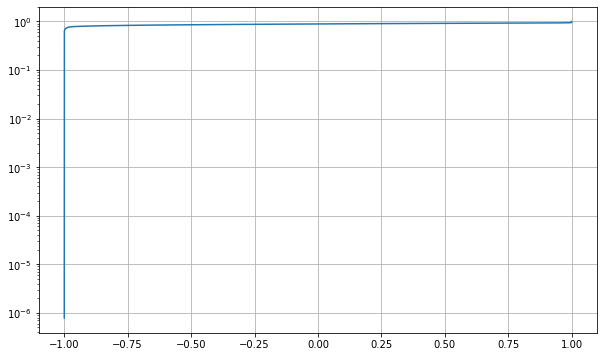

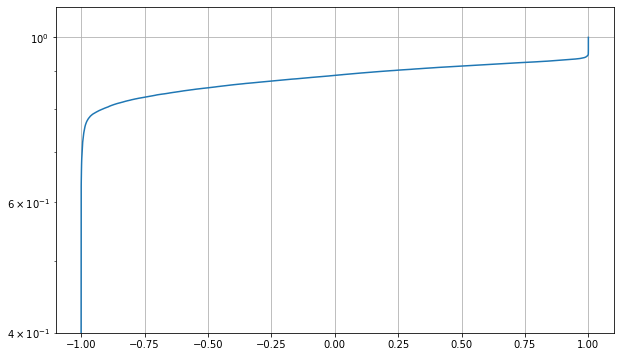

In [97]:
import numpy as np

plt.subplots(figsize=(10, 6))

y = (np.array(list(range(len(p_scores)))) + 1) / len(p_scores)
x = np.array(sorted(p_scores)) * 2 - 1
plt.plot(x, y)
plt.yscale("log")
plt.grid();
# plt.ylim(0.4, 1.1)
# plt.xlim(0.0, 0.05);


plt.subplots(figsize=(10, 6))

y = (np.array(list(range(len(p_scores)))) + 1) / len(p_scores)
x = np.array(sorted(p_scores)) * 2 - 1
plt.plot(x, y)
plt.yscale("log")
plt.grid();
plt.ylim(0.4, 1.1);
# plt.xlim(0.0, 0.05);


In [98]:
total = len(examples)
print("%d %.5f %.5f %.5f" % (total, len(good_points) / total, len(uncertain) / total, len(bad_points) / total))

1276514 0.51967 0.44155 0.03878
